<a href="https://colab.research.google.com/github/iremyuvali/ml-tasks/blob/main/task4_iremyuvali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**iremyuvali | 2017555071**

In [ ]:
!git clone https://github.com/gregorLen/AnfisTensorflow2.0.git

Cloning into 'AnfisTensorflow2.0'...
remote: Enumerating objects: 3026, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 3026 (delta 18), reused 15 (delta 15), pack-reused 3004
Receiving objects: 100% (3026/3026), 9.44 MiB | 23.51 MiB/s, done.
Resolving deltas: 100% (549/549), done.


In [ ]:
from Models import myanfis
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
data_w = pd.read_csv("wine-quality.csv")
data_w

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
std_scaler = StandardScaler()

w2 = data_w.copy()

w2['free sulfur dioxide'] = std_scaler.fit_transform(w2[['free sulfur dioxide']])
w2['density'] = std_scaler.fit_transform(w2[['density']])
w2['quality'] = std_scaler.fit_transform(w2[['quality']])
X = w2.iloc[:-199,[1,7]]
Y = w2.iloc[:-199,-1]

x = w2.iloc[-199:,[1,7]]
y = w2.iloc[-199:,-1]

w2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,-0.466193,34.0,0.558274,3.51,0.56,9.4,-0.787823
1,7.8,0.880,0.00,2.6,0.098,0.872638,67.0,0.028261,3.20,0.68,9.8,-0.787823
2,7.8,0.760,0.04,2.3,0.092,-0.083669,54.0,0.134264,3.26,0.65,9.8,-0.787823
3,11.2,0.280,0.56,1.9,0.075,0.107592,60.0,0.664277,3.16,0.58,9.8,0.450848
4,7.4,0.700,0.00,1.9,0.076,-0.466193,34.0,0.558274,3.51,0.56,9.4,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,1.542054,44.0,-0.978765,3.45,0.58,10.5,-0.787823
1595,5.9,0.550,0.10,2.2,0.062,2.211469,51.0,-0.862162,3.52,0.76,11.2,0.450848
1596,6.3,0.510,0.13,2.3,0.076,1.255161,40.0,-0.533554,3.42,0.75,11.0,0.450848
1597,5.9,0.645,0.12,2.0,0.075,1.542054,44.0,-0.676657,3.57,0.71,10.2,-0.787823


In [ ]:
param = myanfis.fis_parameters(
        n_input = 2,                
        n_memb = 2,                 
        batch_size = 5,            
        memb_func = 'gaussian',      
        optimizer = 'sgd',          
        loss = tf.keras.losses.MeanAbsoluteError(),               
        n_epochs = 20               
        )

In [ ]:
kfold = KFold(n_splits=2)
histories = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    fis = myanfis.ANFIS(n_input = param.n_input,
                    n_memb = param.n_memb,
                    batch_size = param.batch_size,
                    memb_func = param.memb_func,
                    name = 'firstAnfis'
                    )

    fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae']
                      )

    history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data = (X_test, Y_test),
                  )
    histories.append(history)

Epoch 1/20
140/140 [==============================] - 1s 5ms/step - loss: 0.8492 - mae: 0.8492 - val_loss: 0.8601 - val_mae: 0.8601
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.8165 - mae: 0.8165 - val_loss: 0.8234 - val_mae: 0.8234
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 0.8000 - mae: 0.8000 - val_loss: 0.8013 - val_mae: 0.8013
Epoch 4/20
140/140 [==============================] - 1s 4ms/step - loss: 0.7869 - mae: 0.7869 - val_loss: 0.7868 - val_mae: 0.7868
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.7764 - mae: 0.7764 - val_loss: 0.7781 - val_mae: 0.7781
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.7670 - mae: 0.7670 - val_loss: 0.7726 - val_mae: 0.7726
Epoch 7/20
140/140 [==============================] - 1s 4ms/step - loss: 0.7594 - mae: 0.7594 - val_loss: 0.7720 - val_mae: 0.7720
Epoch 8/20
140/140 [==============================] - 1s 4ms/step - loss: 0.

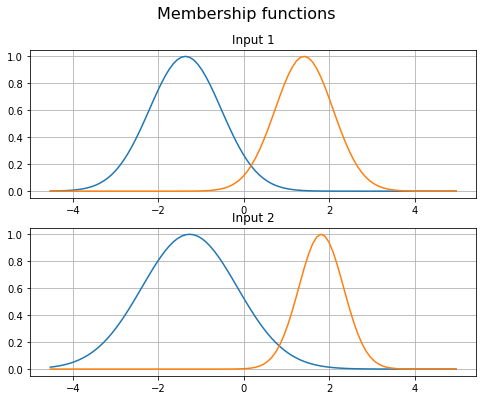

In [ ]:
fis.plotmfs()

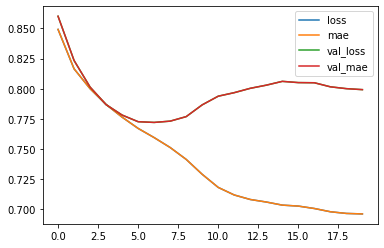

In [ ]:
pd.DataFrame(histories[0].history).plot()

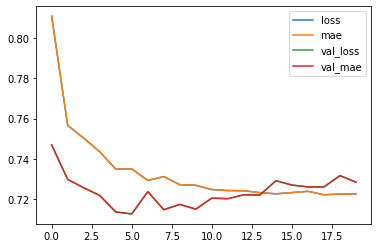

In [ ]:
pd.DataFrame(histories[1].history).plot()

In [ ]:
minmax = MinMaxScaler()

w2 = data_w.copy()

w2['free sulfur dioxide'] = minmax.fit_transform(w2[['free sulfur dioxide']])
w2['density'] = minmax.fit_transform(w2[['density']])
w2['quality'] = minmax.fit_transform(w2[['quality']])

X = w2.iloc[:-199,[1,7]]
Y = w2.iloc[:-199,-1]

x = w2.iloc[-199:,[1,7]]
y = w2.iloc[-199:,-1]

w2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,0.140845,34.0,0.567548,3.51,0.56,9.4,0.4
1,7.8,0.880,0.00,2.6,0.098,0.338028,67.0,0.494126,3.20,0.68,9.8,0.4
2,7.8,0.760,0.04,2.3,0.092,0.197183,54.0,0.508811,3.26,0.65,9.8,0.4
3,11.2,0.280,0.56,1.9,0.075,0.225352,60.0,0.582232,3.16,0.58,9.8,0.6
4,7.4,0.700,0.00,1.9,0.076,0.140845,34.0,0.567548,3.51,0.56,9.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,0.436620,44.0,0.354626,3.45,0.58,10.5,0.4
1595,5.9,0.550,0.10,2.2,0.062,0.535211,51.0,0.370778,3.52,0.76,11.2,0.6
1596,6.3,0.510,0.13,2.3,0.076,0.394366,40.0,0.416300,3.42,0.75,11.0,0.6
1597,5.9,0.645,0.12,2.0,0.075,0.436620,44.0,0.396476,3.57,0.71,10.2,0.4


In [ ]:
param = myanfis.fis_parameters(
        n_input = 2,                
        n_memb = 2,                 
        batch_size = 5,            
        memb_func = 'gaussian',      
        optimizer = 'sgd',          
        loss = tf.keras.losses.MeanAbsoluteError(),               
        n_epochs = 20               
        )

In [ ]:
kfold = KFold(n_splits=2)
histories = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    fis = myanfis.ANFIS(n_input = param.n_input,
                    n_memb = param.n_memb,
                    batch_size = param.batch_size,
                    memb_func = param.memb_func,
                    name = 'firstAnfis'
                    )

    fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae']
                      )

    history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data = (X_test, Y_test),
                  )
    histories.append(history)

Epoch 1/20
140/140 [==============================] - 1s 4ms/step - loss: 0.2287 - mae: 0.2287 - val_loss: 0.2201 - val_mae: 0.2201
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.2051 - mae: 0.2051 - val_loss: 0.2297 - val_mae: 0.2297
Epoch 3/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1950 - mae: 0.1950 - val_loss: 0.1877 - val_mae: 0.1877
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.1850 - mae: 0.1850 - val_loss: 0.1729 - val_mae: 0.1729
Epoch 5/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1781 - mae: 0.1781 - val_loss: 0.1792 - val_mae: 0.1792
Epoch 6/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1698 - mae: 0.1698 - val_loss: 0.1597 - val_mae: 0.1597
Epoch 7/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1626 - mae: 0.1626 - val_loss: 0.1698 - val_mae: 0.1698
Epoch 8/20
140/140 [==============================] - 0s 3ms/step - loss: 0.

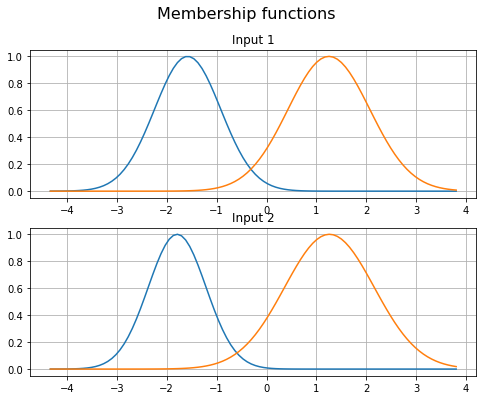

In [ ]:
fis.plotmfs()

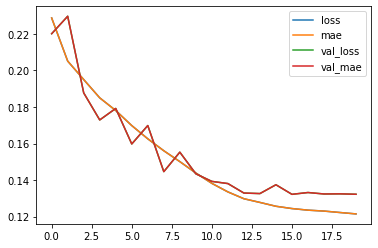

In [ ]:
pd.DataFrame(histories[0].history).plot()

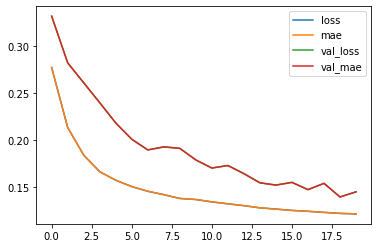

In [ ]:
pd.DataFrame(histories[1].history).plot()